In [1]:
import pandas as pd
import matplotlib.pyplot as plt

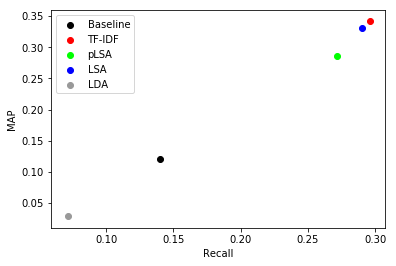

In [19]:
plt.scatter(0.14,0.12,label="Baseline",c="#000000") # baseline
plt.scatter(0.295971486188622,0.34292979709666,label="TF-IDF",c="#ff0000")
plt.scatter(0.271209492097734,0.285346343355301,label="pLSA",c="#00ff00")
plt.scatter(0.2897809876659,0.330624171380633,label="LSA",c="#0000ff")
plt.scatter(0.0717066078881958,0.0297436481510017,label="LDA",c="#999999")

plt.xlabel("Recall")
plt.ylabel("MAP")
plt.legend()
plt.show()

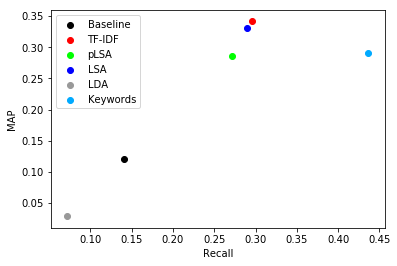

In [20]:
plt.scatter(0.14,0.12,label="Baseline",c="#000000") # baseline
plt.scatter(0.295971486188622,0.34292979709666,label="TF-IDF",c="#ff0000")
plt.scatter(0.271209492097734,0.285346343355301,label="pLSA",c="#00ff00")
plt.scatter(0.2897809876659,0.330624171380633,label="LSA",c="#0000ff")
plt.scatter(0.0717066078881958,0.0297436481510017,label="LDA",c="#999999")
plt.scatter(0.436565138642412,0.290271264733183,label="Keywords",c="#00aaff")

plt.xlabel("Recall")
plt.ylabel("MAP")
plt.legend()
plt.show()

In [22]:
lens = [1, 0, 0, 241, 11, 0, 3, 323, 2, 0, 1, 15, 0, 11, 6, 19, 0, 1, 1, 22, 1, 8, 2, 0, 107, 32, 2, 3, 0, 1, 61, 9, 2, 7, 52, 212, 0, 54, 6, 49, 764, 59, 9, 19, 8, 44, 102, 9, 2, 1, 80, 153, 35, 8, 105, 0, 0, 103, 18, 0, 0, 0, 0, 1, 0, 4, 0, 2, 0, 2, 2, 43, 2, 47, 85, 10, 195, 320, 24, 18, 1, 7, 4, 121, 0, 113, 15, 110, 1, 2, 0, 4, 1, 1, 20, 12, 0, 19, 29, 1, 1, 0, 47, 16, 6, 2, 2, 1, 0, 1, 124, 7, 10, 0, 1, 21, 5, 1, 74, 44, 0, 5, 2, 1, 0, 82, 207, 17, 1, 33, 1, 0, 0, 0, 0, 19, 36, 111, 4, 1, 23, 0, 0, 119, 1, 36]

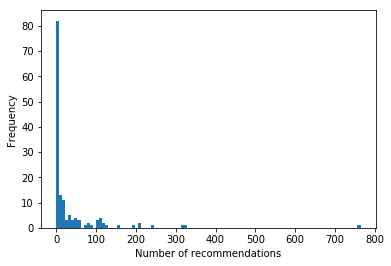

In [54]:
len_keywords = pd.DataFrame(lens)
len_keywords.plot(kind="hist",bins=100)
plt.legend().remove()
plt.xlabel("Number of recommendations")
plt.show()

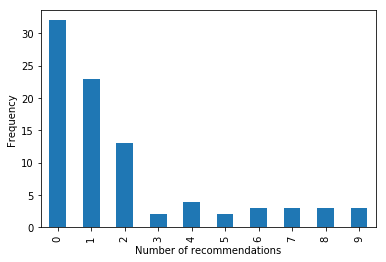

In [53]:
hist = len_keywords
hist["count"] = 0
hist = len_keywords.groupby(0).count().reset_index()
hist.columns = ["len","count"]
hist[hist["len"]<10]["count"].plot(kind="bar")
plt.xlabel("Number of recommendations")
plt.ylabel("Frequency")
plt.show()

In [55]:
print(len_keywords.median())
print(len_keywords.mean())
print(len_keywords.max())

0    4.0
dtype: float64
0    34.671233
dtype: float64
0    764
dtype: int64
